We are given ten years of data from Major League Baseball and are tasked with created a GLM model to predict the number of runs scored by home teams. We are asked to calculate correlation between our prediction and actual outcomes and provide a scatterplot. Finally, we must pick a random game in the 2017 season and use our model to predict how many runs are expcted to be scored.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import GammaRegressor

In [ ]:
baseball = pd.read_csv('/content/GB886_III_9_BBallLogs.csv')

baseball.head(5)

,Year,Month,Day,day_of_week,h_name,h_game_number,h_wins,v_name,v_game_number,v_wins,h_score,v_score
0,2006,4,2,Sun,CHA,1,0,CLE,1,0,10,4
1,2006,4,3,Mon,BAL,1,0,TBA,1,0,9,6
2,2006,4,3,Mon,KCA,1,0,DET,1,0,1,3
3,2006,4,3,Mon,OAK,1,0,NYA,1,0,2,15
4,2006,4,3,Mon,SEA,1,0,ANA,1,0,4,5


In [ ]:
#generate stats
#baseball.describe()
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26725 entries, 0 to 26724
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           26725 non-null  int64 
 1   Month          26725 non-null  int64 
 2   Day            26725 non-null  int64 
 3   day_of_week    26725 non-null  object
 4   h_name         26725 non-null  object
 5   h_game_number  26725 non-null  int64 
 6   h_wins         26725 non-null  int64 
 7   v_name         26725 non-null  object
 8   v_game_number  26725 non-null  int64 
 9   v_wins         26725 non-null  int64 
 10  h_score        26725 non-null  int64 
 11  v_score        26725 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 2.4+ MB


In [ ]:
#find numerical variables
numerical=list(baseball.select_dtypes(include=['int64','float64']).columns)
#find categorical variables
categorical = list(baseball.select_dtypes(include=['object']).columns)
#separate numerical and categorical variables
baseball_numerical = baseball[numerical]
baseball_categorical = baseball[categorical]
print("Numerical columns:",numerical)
print("Categorical Columns:", categorical)

Numerical columns: ['Year', 'Month', 'Day', 'h_game_number', 'h_wins', 'v_game_number', 'v_wins', 'h_score', 'v_score']
Categorical Columns: ['day_of_week', 'h_name', 'v_name']


In [ ]:
#create dummies
dummies = pd.get_dummies(baseball_categorical, drop_first=True)
print(dummies)

       day_of_week_Mon  day_of_week_Sat  day_of_week_Sun  day_of_week_Thu  \
0                False            False             True            False   
1                 True            False            False            False   
2                 True            False            False            False   
3                 True            False            False            False   
4                 True            False            False            False   
...                ...              ...              ...              ...   
26720            False            False             True            False   
26721            False            False             True            False   
26722            False            False             True            False   
26723            False            False             True            False   
26724            False            False             True            False   

       day_of_week_Tue  day_of_week_Wed  h_name_ARI  h_name_ATL  h_name_BAL

In [ ]:
# combine numerical and dummies
baseball_cleaned = pd.concat([baseball_numerical, dummies], axis=1)
#convert columns to a list to select variables to use for our model
print(baseball_cleaned.columns.tolist())

['Year', 'Month', 'Day', 'h_game_number', 'h_wins', 'v_game_number', 'v_wins', 'h_score', 'v_score', 'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'h_name_ARI', 'h_name_ATL', 'h_name_BAL', 'h_name_BOS', 'h_name_CHA', 'h_name_CHN', 'h_name_CIN', 'h_name_CLE', 'h_name_COL', 'h_name_DET', 'h_name_HOU', 'h_name_KCA', 'h_name_LAN', 'h_name_MIA', 'h_name_MIL', 'h_name_MIN', 'h_name_NYA', 'h_name_NYN', 'h_name_OAK', 'h_name_PHI', 'h_name_PIT', 'h_name_SDN', 'h_name_SEA', 'h_name_SFN', 'h_name_SLN', 'h_name_TBA', 'h_name_TEX', 'h_name_TOR', 'h_name_WAS', 'v_name_ARI', 'v_name_ATL', 'v_name_BAL', 'v_name_BOS', 'v_name_CHA', 'v_name_CHN', 'v_name_CIN', 'v_name_CLE', 'v_name_COL', 'v_name_DET', 'v_name_HOU', 'v_name_KCA', 'v_name_LAN', 'v_name_MIA', 'v_name_MIL', 'v_name_MIN', 'v_name_NYA', 'v_name_NYN', 'v_name_OAK', 'v_name_PHI', 'v_name_PIT', 'v_name_SDN', 'v_name_SEA', 'v_name_SFN', 'v_name_SLN', 'v_name_TBA', 'v_name_TEX', '

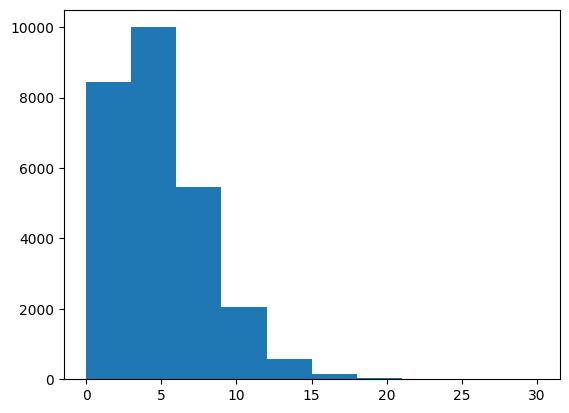

In [ ]:
#visualize home team score data
plt.hist(baseball['v_score'])
plt.show()

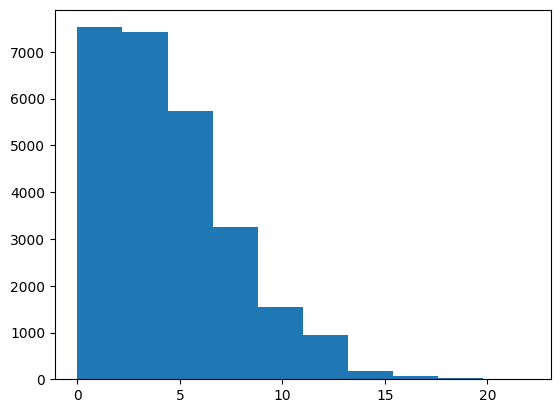

In [ ]:
plt.hist(baseball['h_score'])
plt.show()

In [ ]:
#let's create a poisson model using H_wins, V_wins, game number, year,day of the week and month of season. These variables likely predict team strength, fatigue/injury accumulation and yearly difference
y=baseball_cleaned['h_score']
x=baseball_cleaned[['h_wins','v_wins','h_game_number','Day','Month','Year',]]



model = PoissonRegressor(max_iter=10000)
model.fit(x,y)
preds = model.predict(x)
np.corrcoef(preds,y)



array([[1.        , 0.09823526],
       [0.09823526, 1.        ]])

Text(0.5, 1.0, 'Poisson Model: Actual vs Predicted Home Score')

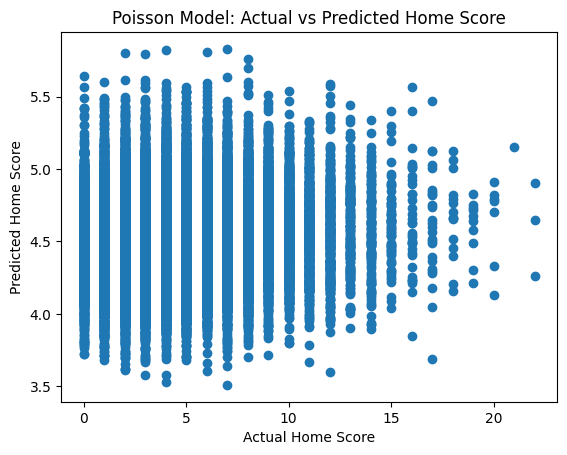

In [ ]:
#vizualize
plt.scatter(y,preds)
plt.xlabel('Actual Home Score')
plt.ylabel('Predicted Home Score')
plt.title('Poisson Model: Actual vs Predicted Home Score')

In [ ]:
#The Poission Model had a very low correlation so we'll try gamma. First, we need to remove zero values
baseball_positive=baseball_cleaned[baseball_cleaned['h_score']>0]

y2=baseball_positive['h_score']
x2=baseball_positive[['h_wins','v_wins','h_game_number','Day','Month','Year']]

model = GammaRegressor()
model.fit(x2,y2)
preds2 = model.predict(x2)
np.corrcoef(preds2,y2)

# The Gamma model has an even lower correlation coeff, so we'll use Poisson to to predict the scenario

array([[1.       , 0.0657665],
       [0.0657665, 1.       ]])

In [ ]:
# predict random game from 2017. September 17, 2017 - CIN vs PIT. CIN (home) - 5 PIT - 2

x3=pd.DataFrame({'h_wins':[66],'v_wins':[68],'h_game_number':[150],'Day':[0],'Month':[9],'Year':[2017]})
preds = model.predict(x3)
print("The predicted number of home runs using  Poisson model is:",preds)


The predicted number of home runs using  Poisson model is: [4.12472177]


Using the Poisson prediction model, the expected number of home team runs is 4.12, while the actual was 5 runs.which is about 18% off. This is about 18% off, which performs well for a single-game prediction. Overall the model only correlates about 0.1 to the whole dataset. This suggests the model is limited due to other factors such as individual player injuries, incentives, weather conditions, etc. The model is good for making ballpark estimates but can't be relied on for precise predictions.